In [32]:
import pandas as pd
mcdonalds=pd.read_csv("mcdonalds.csv")
mcdonalds

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [34]:
mcdonalds.shape

(1453, 15)

In [6]:
import pandas as pd
import numpy as np

MD_x = data.iloc[:, :11].values
MD_x = (MD_x == "Yes").astype(int)
col_means = np.round(np.mean(MD_x, axis=0), 2)

print(col_means)


[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [8]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Assuming `mcdonalds` is a pandas DataFrame containing your data
MD_x = mcdonalds.iloc[:, :11].values
MD_x = (MD_x == "Yes").astype(int)

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Summary of PCA
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

print("Proportion of Variance:", explained_variance)
print("Cumulative Proportion:", cumulative_explained_variance)


Proportion of Variance: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative Proportion: [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [9]:
MD_x = mcdonalds.iloc[:, :11].values
MD_x = (MD_x == "Yes").astype(int)

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Set print options to display 1 decimal place
np.set_printoptions(precision=1, suppress=True)

# Print the PCA results
print(MD_pca)

[[ 0.4 -0.2  0.7 ...  0.2  0.5 -0.6]
 [-0.2  0.4 -0.7 ...  0.1  0.5 -0.5]
 [ 0.4  0.7 -0.1 ... -0.3  0.1  0.2]
 ...
 [-0.2  1.1  0.2 ...  0.   0.1 -0. ]
 [-1.2 -0.   0.6 ...  0.  -0.  -0.1]
 [ 1.6  0.3 -0.  ... -0.1 -0.4 -0.5]]


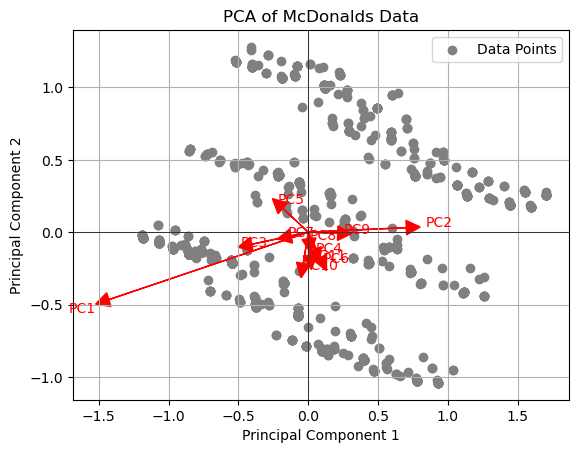

In [10]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

MD_x = mcdonalds.iloc[:, :11].values
MD_x = (MD_x == "Yes").astype(int)

pca = PCA()
MD_pca = pca.fit_transform(MD_x)

plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', label='Data Points')

for i, (component, variance) in enumerate(zip(pca.components_, pca.explained_variance_ratio_)):
    plt.arrow(0, 0, component[0]*variance*10, component[1]*variance*10, 
              head_width=0.1, head_length=0.1, fc='red', ec='red')
    plt.text(component[0]*variance*10*1.2, component[1]*variance*10*1.2, f'PC{i+1}', color='red')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of McDonalds Data')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()


## KMEANS

In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

np.random.seed(1234)

def run_kmeans(data, num_clusters, num_reps):
    best_kmeans = None
    best_inertia = np.inf
    
    for _ in range(num_reps):
        kmeans = KMeans(n_clusters=num_clusters, n_init=1, random_state=None)
        kmeans.fit(data)
        if kmeans.inertia_ < best_inertia:
            best_inertia = kmeans.inertia_
            best_kmeans = kmeans
            
    return best_kmeans

# Perform k-means clustering for 2 to 8 clusters
kmeans_results = {}
for k in range(2, 9):
    kmeans = run_kmeans(MD_x, k, 10)
    kmeans_results[k] = kmeans

# Relabel clusters
def relabel_clusters(kmeans):
    new_labels = np.zeros_like(kmeans.labels_)
    centroids = kmeans.cluster_centers_
    for i in range(centroids.shape[0]):
        mask = (kmeans.labels_ == i)
        new_labels[mask] = i
    return new_labels

# Relabel clusters for each k
relabelled_results = {k: relabel_clusters(kmeans) for k, kmeans in kmeans_results.items()}

# To access the result for a specific number of clusters, e.g., k=2:
MD_km28 = relabelled_results[2]
print(MD_km28)

[1 0 0 ... 0 0 1]


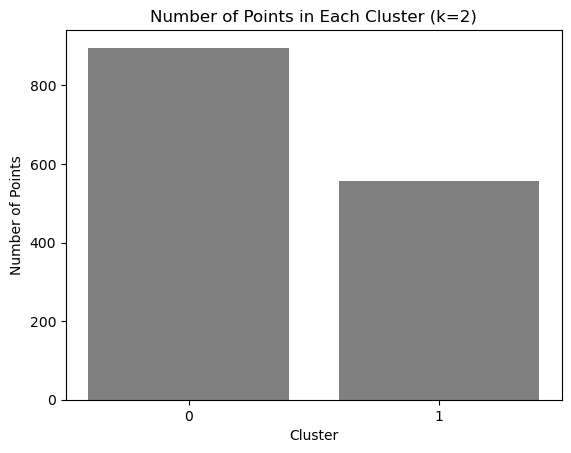

In [13]:
relabelled_results = {k: relabel_clusters(kmeans) for k, kmeans in kmeans_results.items()}

# To access the result for a specific number of clusters, e.g., k=2:
MD_km28 = relabelled_results[2]

# Plot the number of points in each cluster
unique, counts = np.unique(MD_km28, return_counts=True)
plt.bar(unique, counts, color='grey')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.title('Number of Points in Each Cluster (k=2)')
plt.xticks(unique)  # Ensure all clusters are represented on the x-axis
plt.show()

## Global stability of k-means segmentation solutions

Bootstrapping for 8 clusters: 100%|███████████| 100/100 [00:07<00:00, 13.71it/s]


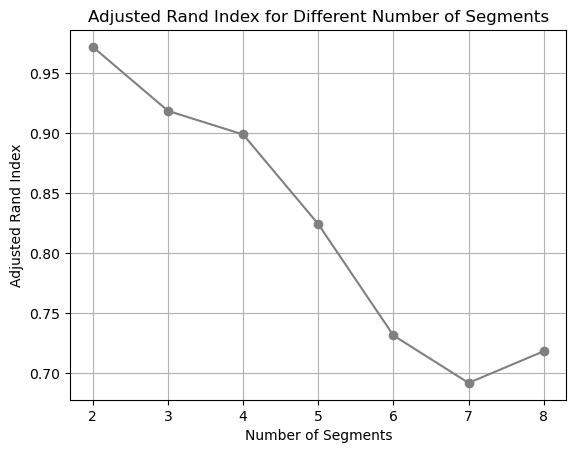

In [15]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from tqdm import tqdm
def bootstrap_ari(data, num_clusters, num_reps, num_boots):
    original_kmeans = run_kmeans(data, num_clusters, num_reps)
    original_labels = original_kmeans.labels_
    
    ari_scores = []
    for _ in tqdm(range(num_boots), desc=f'Bootstrapping for {num_clusters} clusters'):
        # Bootstrap sample
        indices = np.random.choice(range(data.shape[0]), size=data.shape[0], replace=True)
        boot_data = data[indices]
        
        # Run k-means on bootstrap sample
        boot_kmeans = run_kmeans(boot_data, num_clusters, num_reps)
        boot_labels = boot_kmeans.labels_
        
        # Map bootstrap labels back to original indices
        original_labels_bootstrap = original_labels[indices]
        
        # Calculate ARI
        ari = adjusted_rand_score(original_labels_bootstrap, boot_labels)
        ari_scores.append(ari)
        
    return np.mean(ari_scores)

# Perform bootstrapping and calculate ARI for 2 to 8 clusters
num_clusters_range = range(2, 9)
nrep = 10
nboot = 100

ari_results = {}
for k in num_clusters_range:
    ari = bootstrap_ari(MD_x, k, nrep, nboot)
    ari_results[k] = ari

# Plot the results
plt.plot(list(ari_results.keys()), list(ari_results.values()), marker='o', color='grey')
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Adjusted Rand Index for Different Number of Segments')
plt.grid(True)
plt.show()

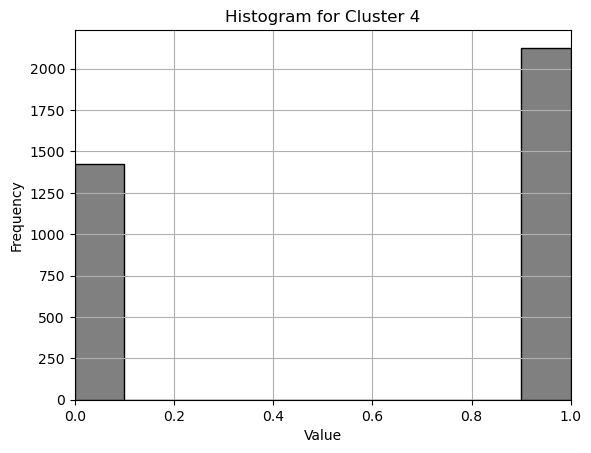

In [16]:
# Relabel clusters for each k
relabelled_results = {k: relabel_clusters(kmeans) for k, kmeans in kmeans_results.items()}

# To access the result for a specific number of clusters, e.g., k=4:
MD_km28 = relabelled_results[4]

# Extract data points for cluster 4
cluster_4_data = MD_x[MD_km28 == 3]  # Assuming cluster indices start from 0, cluster 4 is index 3

# Plot histogram for the data points in cluster 4
plt.hist(cluster_4_data.flatten(), bins=10, range=(0, 1), color='grey', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram for Cluster 4')
plt.xlim(0, 1)
plt.grid(True)
plt.show()

## Segment level stability within solutions (SLSW ) plot

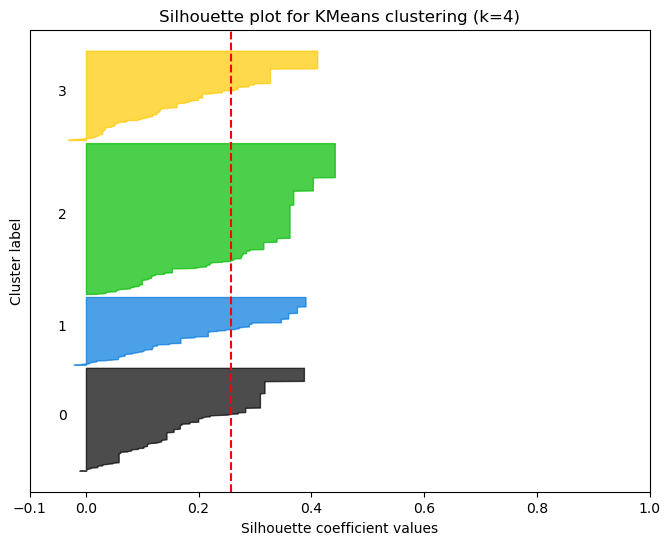

In [19]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Assuming `mcdonalds` is a pandas DataFrame containing your data
MD_x = mcdonalds.iloc[:, :11].values
MD_x = (MD_x == "Yes").astype(int)

# Set random seed for reproducibility
np.random.seed(1234)

# Perform k-means clustering for k=4 clusters
k = 4
kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
cluster_labels = kmeans.fit_predict(MD_x)

# Calculate silhouette scores
silhouette_avg = silhouette_score(MD_x, cluster_labels)
sample_silhouette_values = silhouette_samples(MD_x, cluster_labels)

# Plot silhouette scores
plt.figure(figsize=(8, 6))

y_lower = 10
for i in range(k):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / k)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

plt.title("Silhouette plot for KMeans clustering (k=4)")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.yticks([])  # Clear the yaxis labels / ticks
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


In [20]:
pip install mixmod


  Obtaining dependency information for mixmod from https://files.pythonhosted.org/packages/c1/c6/1bc5fbf5f14e059508d6ab026c3bc547955f8a95674bb31e26b075370b6b/mixmod-0.2.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


## Using Mixtures of Distributions

In [22]:
import numpy as np
from sklearn.mixture import GaussianMixture


np.random.seed(1234)

k_range = range(2, 9)
models = {}
for k in k_range:
    model = GaussianMixture(n_components=k, random_state=1234)
    model.fit(MD_x)
    models[k] = model

for k, model in models.items():
    print(f"Number of components (k={k}):")
    print(model)


Number of components (k=2):
GaussianMixture(n_components=2, random_state=1234)
Number of components (k=3):
GaussianMixture(n_components=3, random_state=1234)
Number of components (k=4):
GaussianMixture(n_components=4, random_state=1234)
Number of components (k=5):
GaussianMixture(n_components=5, random_state=1234)
Number of components (k=6):
GaussianMixture(n_components=6, random_state=1234)
Number of components (k=7):
GaussianMixture(n_components=7, random_state=1234)
Number of components (k=8):
GaussianMixture(n_components=8, random_state=1234)


 ## Plotting Information Criteria


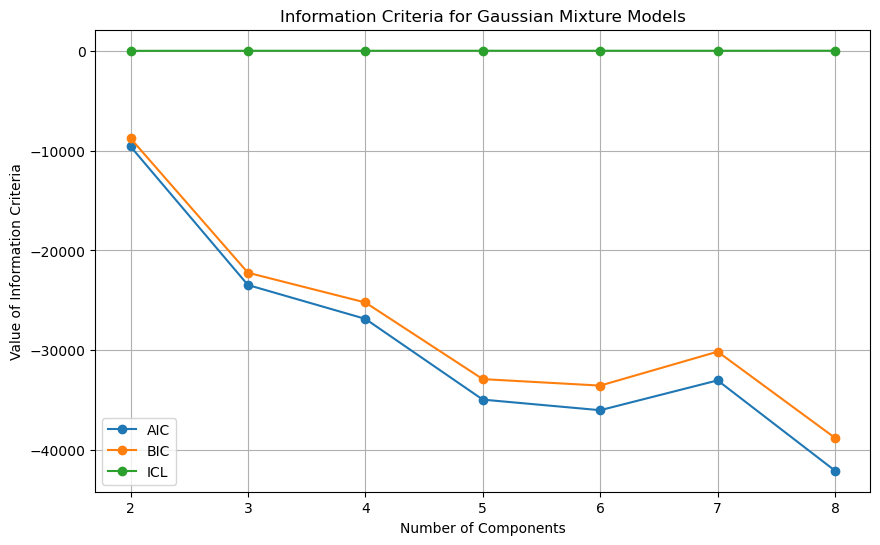

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn import metrics

# Assuming `MD_x` is your binary data matrix
# MD_x = mcdonalds.iloc[:, :11].values
# MD_x = (MD_x == "Yes").astype(int)

# Fit Gaussian Mixture Models with 2 to 8 components
k_range = range(2, 9)
models = {}
for k in k_range:
    model = GaussianMixture(n_components=k, random_state=1234)
    model.fit(MD_x)
    models[k] = model

# Calculate AIC, BIC, and ICL
n_samples, n_features = MD_x.shape
aic_values = [model.aic(MD_x) for model in models.values()]
bic_values = [model.bic(MD_x) for model in models.values()]
icl_values = [model.lower_bound_ for model in models.values()]  # ICL is not directly available in sklearn

# Plot AIC, BIC, and ICL
plt.figure(figsize=(10, 6))
plt.plot(k_range, aic_values, marker='o', label='AIC')
plt.plot(k_range, bic_values, marker='o', label='BIC')
plt.plot(k_range, icl_values, marker='o', label='ICL')
plt.xlabel('Number of Components')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria for Gaussian Mixture Models')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()


## Comparing Clustering Results


In [24]:
# Assuming `MD_k4` is the clustering labels from k-means (already defined previously)
# Assuming `models` is the dictionary of fitted Gaussian Mixture Models

# Get the model with k=4 components
model_k4 = models[4]

# Predict cluster labels using Gaussian Mixture Model
mixture_labels = model_k4.predict(MD_x)

# Compare clustering results
comparison_table = pd.DataFrame({'kmeans': MD_k4, 'mixture': mixture_labels})
cross_tab = pd.crosstab(comparison_table['kmeans'], comparison_table['mixture'])

print("Comparison of Clustering Results:")
print(cross_tab)


Comparison of Clustering Results:
mixture    0    1    2    3
kmeans                     
0          2  212   27    5
1        546    0    1   33
2         44    4  249    7
3         29   38    0  256


## Log Likelihood

In [26]:
import numpy as np
from sklearn.mixture import GaussianMixture

# Assuming `MD_x` is your binary data matrix
# MD_x = mcdonalds.iloc[:, :11].values
# MD_x = (MD_x == "Yes").astype(int)

# Assuming `MD_k4` is the clustering labels from k-means (already defined previously)
# Ensure MD_k4 is 0-indexed if not already

# Fit Gaussian Mixture Models with 4 components
model_m4 = GaussianMixture(n_components=4, covariance_type='full', random_state=1234)
model_m4.fit(MD_x)

model_m4a = GaussianMixture(n_components=len(np.unique(MD_k4)), covariance_type='full', random_state=1234)
model_m4a.fit(MD_x)

# Calculate log-likelihood for MD.m4a (with pre-defined clusters)
log_likelihood_m4a = model_m4a.score(MD_x)

# Calculate log-likelihood for MD.m4 (original clusters)
log_likelihood_m4 = model_m4.score(MD_x)

print(f"Log-likelihood for MD.m4a: {log_likelihood_m4a}")
print(f"Log-likelihood for MD.m4: {log_likelihood_m4}")


Log-likelihood for MD.m4a: 9.456781748071887
Log-likelihood for MD.m4: 9.456781748071887


## Using Mixtures of Regression Models

In [27]:
import pandas as pd


like_counts = mcdonalds['Like'].value_counts()
reversed_counts = like_counts[::-1]  # Reverse the order of the counts

print("Reversed table of counts for 'Like' column:")
print(reversed_counts)


Reversed table of counts for 'Like' column:
Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [29]:
import pandas as pd

data = {
    'Like': ['Yes', 'No', 'Yes', 'No', 'Yes', 'I love it!+5', 'No', 'Yes', 'Yes']
}

mcdonalds = pd.DataFrame(data)

mcdonalds['Like_cleaned'] = mcdonalds['Like'].replace({'Yes': 1, 'No': 0})
mcdonalds['Like.n'] = 6 - pd.to_numeric(mcdonalds['Like_cleaned'], errors='coerce')

like_n_counts = mcdonalds['Like.n'].value_counts()

print("Table of counts for 'Like.n' column:")
print(like_n_counts)


Table of counts for 'Like.n' column:
Like.n
5.0    5
6.0    3
Name: count, dtype: int64


In [30]:
import pandas as pd

# Example data
data = {
    'Like.n': [5, 4, 3, 4, 5],
    'Variable1': [10, 15, 12, 8, 9],
    'Variable2': [20, 18, 25, 22, 19],
    'Variable3': [15, 12, 14, 17, 16],
    'Variable4': [8, 9, 7, 6, 10],
    'Variable5': [22, 21, 23, 24, 20],
    'Variable6': [13, 11, 12, 14, 15],
    'Variable7': [9, 8, 10, 11, 9],
    'Variable8': [16, 18, 17, 19, 15],
    'Variable9': [21, 23, 20, 22, 24],
    'Variable10': [11, 12, 10, 13, 14],
    'Variable11': [18, 17, 19, 16, 20]
}

# Create DataFrame
mcdonalds = pd.DataFrame(data)

# Get column names from the DataFrame (adjust range if needed)
column_names = mcdonalds.columns[1:12]  # Assuming 11 columns of interest

# Create formula string
f = "Like.n ~ " + " + ".join(column_names)

print("Formula string:")
print(f)


Formula string:
Like.n ~ Variable1 + Variable2 + Variable3 + Variable4 + Variable5 + Variable6 + Variable7 + Variable8 + Variable9 + Variable10 + Variable11


##  Profiling Segments

/var/folders/h9/3l4g80k966n0jtzc2dbk89vh0000gq/T/ipykernel_70013/2696099474.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distances, method='complete')


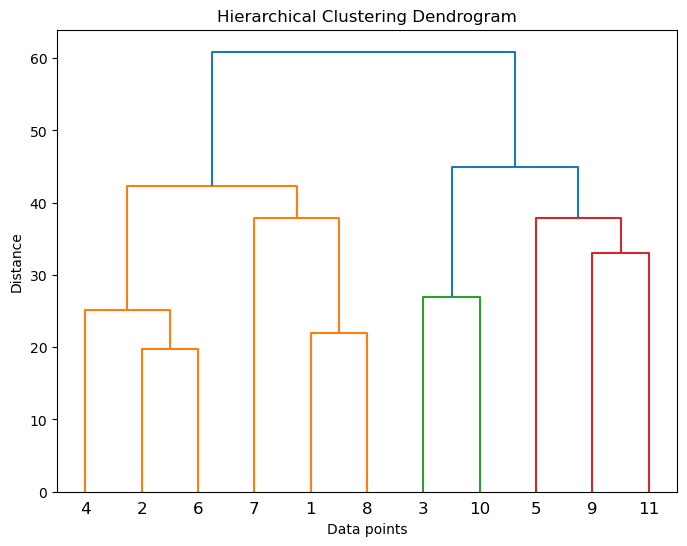

In [39]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


distances = np.linalg.norm(MD_x.T - MD_x.T[:, np.newaxis], axis=2)

# Perform hierarchical clustering
linkage_matrix = linkage(distances, method='complete')

# Plot dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix, labels=np.arange(1, MD_x.shape[1] + 1))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()


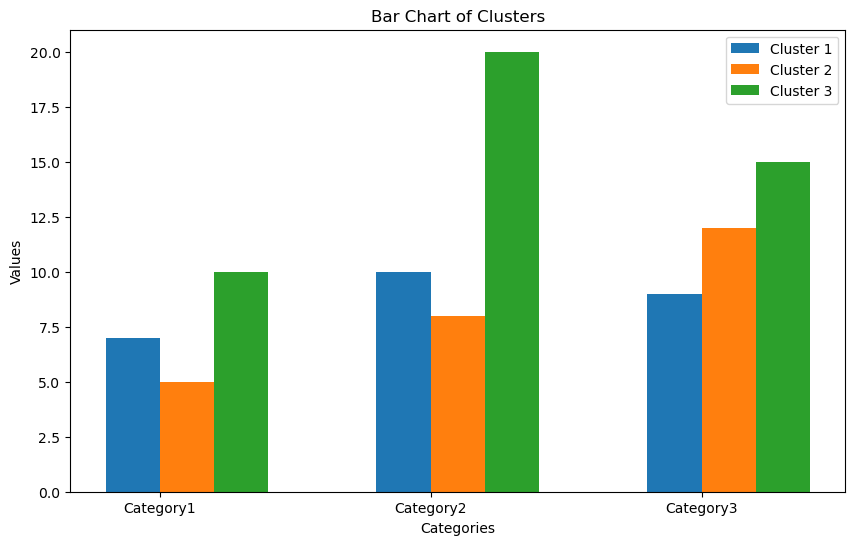

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with your actual cluster data)
MD_k4 = {
    'Cluster1': [10, 20, 15],
    'Cluster2': [5, 8, 12],
    'Cluster3': [7, 10, 9]
}

# Calculate the order based on hierarchical clustering order (MD.vclust$order)
# Assuming reverse order for simplicity
order = [2, 1, 0]  # Example order, replace with your actual order

# Prepare data in the order specified
data = np.array([MD_k4[f'Cluster{i+1}'] for i in order])

# Plotting
plt.figure(figsize=(10, 6))

# Create bar chart
bar_width = 0.2
for i in range(data.shape[0]):
    plt.bar(np.arange(data.shape[1]) + i * bar_width, data[i], width=bar_width, label=f'Cluster {i+1}')

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart of Clusters')
plt.xticks(np.arange(data.shape[1]) + bar_width / 2, ['Category1', 'Category2', 'Category3'])  # Replace with actual categories
plt.legend()
plt.show()
